<a href="https://colab.research.google.com/github/KSithole9/PremierLeague-Goal-Difference-Forecasting/blob/main/ComparingSeasonsDataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


#Loading Datasets

In [ ]:
# Load the dataset
data_2020_2021 = pd.read_csv('2020-2021.csv')
data_2021_2022 = pd.read_csv('2021-2022.csv')

# Counting how many home games, and away games each team played in 2020-2021 and 2021-2022 seasons in a single table

In [ ]:
# Count the number of home games played for each team in the 2020-2021 season
home_games_2020_2021 = data_2020_2021["HomeTeam"].value_counts().reset_index()
home_games_2020_2021.columns = ['Team', 'Home Games Played 2020-2021']

# Count the number of away games played for each team in the 2020-2021 season
away_games_2020_2021 = data_2020_2021["AwayTeam"].value_counts().reset_index()
away_games_2020_2021.columns = ['Team', 'Away Games Played 2020-2021']

# Count the number of home games played for each team in the 2021-2022 season
home_games_2021_2022 = data_2021_2022["HomeTeam"].value_counts().reset_index()
home_games_2021_2022.columns = ['Team', 'Home Games Played 2021-2022']

# Count the number of away games played for each team in the 2021-2022 season
away_games_2021_2022 = data_2021_2022["AwayTeam"].value_counts().reset_index()
away_games_2021_2022.columns = ['Team', 'Away Games Played 2021-2022']

# Merge the data on the team name for both seasons
merged_games_played = pd.merge(home_games_2020_2021, away_games_2020_2021, on='Team', how='outer')
merged_games_played = pd.merge(merged_games_played, home_games_2021_2022, on='Team', how='outer')
merged_games_played = pd.merge(merged_games_played, away_games_2021_2022, on='Team', how='outer')

# Display the result with columns for both seasons
print("Team\tHome Games Played 2020-2021\tAway Games Played 2020-2021\tHome Games Played 2021-2022\tAway Games Played 2021-2022")
print(merged_games_played[['Team', 'Home Games Played 2020-2021', 'Away Games Played 2020-2021', 'Home Games Played 2021-2022', 'Away Games Played 2021-2022']].to_string(index=False, header=True))


Team	Home Games Played 2020-2021	Away Games Played 2020-2021	Home Games Played 2021-2022	Away Games Played 2021-2022
            Team  Home Games Played 2020-2021  Away Games Played 2020-2021  Home Games Played 2021-2022  Away Games Played 2021-2022
          Fulham                         19.0                         19.0                          NaN                          NaN
  Crystal Palace                         19.0                         19.0                         19.0                         19.0
         Burnley                         19.0                         19.0                         19.0                         19.0
          Wolves                         19.0                         19.0                         19.0                         19.0
     Aston Villa                         19.0                         19.0                         19.0                         19.0
       Leicester                         19.0                         19.0           

#assigning points to a team based on match results. 3 points for a win, 1 point for a draw, and 0 points for a loss, considering whether the team is playing at home or away.

In [ ]:
# Define a function to calculate points for both home and away teams
def calculate_points(row, team_type):
    if team_type == 'home':
        if row['FTHG'] > row['FTAG']:
            return 3  # Home win
        elif row['FTHG'] < row['FTAG']:
            return 0  # Away win
        else:
            return 1  # Draw
    elif team_type == 'away':
        if row['FTAG'] > row['FTHG']:
            return 3  # Away win
        elif row['FTAG'] < row['FTHG']:
            return 0  # Home win
        else:
            return 1  # Draw

#Ranking the teams based on their total points in the 2020-2021 season.

In [ ]:
# Apply the function to create new 'HomePoints' and 'AwayPoints' columns for the 2020-2021 season
data_2020_2021['HomePoints'] = data_2020_2021.apply(calculate_points, axis=1, team_type='home')
data_2020_2021['AwayPoints'] = data_2020_2021.apply(calculate_points, axis=1, team_type='away')

# Apply the function to create new 'HomePoints' and 'AwayPoints' columns for the 2021-2022 season
data_2021_2022['HomePoints'] = data_2021_2022.apply(calculate_points, axis=1, team_type='home')
data_2021_2022['AwayPoints'] = data_2021_2022.apply(calculate_points, axis=1, team_type='away')

In [ ]:
# Group by team and sum the points for the 2020-2021 season
team_points_2020_2021 = data_2020_2021.groupby('HomeTeam')['HomePoints'].sum().add(data_2020_2021.groupby('AwayTeam')['AwayPoints'].sum(), fill_value=0)

# Create a DataFrame for team rankings for the 2020-2021 season
team_rankings_2020_2021 = pd.DataFrame({'Team': team_points_2020_2021.index, 'TotalPoints_2020_2021': team_points_2020_2021.values})

# Sort the DataFrame by total points to get the ranking for the 2020-2021 season
team_rankings_2020_2021 = team_rankings_2020_2021.sort_values(by='TotalPoints_2020_2021', ascending=False).reset_index(drop=True)

# Display the team rankings for the 2020-2021 season
print("Team Rankings for 2020-2021 Season:")
print(team_rankings_2020_2021)




Team Rankings for 2020-2021 Season:
                Team  TotalPoints_2020_2021
0           Man City                     86
1         Man United                     74
2          Liverpool                     69
3            Chelsea                     67
4          Leicester                     66
5           West Ham                     65
6          Tottenham                     62
7            Arsenal                     61
8              Leeds                     59
9            Everton                     59
10       Aston Villa                     55
11         Newcastle                     45
12            Wolves                     45
13    Crystal Palace                     44
14       Southampton                     43
15          Brighton                     41
16           Burnley                     39
17            Fulham                     28
18         West Brom                     26
19  Sheffield United                     23


#Ranking the teams based on their total points in the 2021-2022 season.

In [ ]:
# Group by team and sum the points for the 2021-2022 season
team_points_2021_2022 = data_2021_2022.groupby('HomeTeam')['HomePoints'].sum().add(data_2021_2022.groupby('AwayTeam')['AwayPoints'].sum(), fill_value=0)

# Create a DataFrame for team rankings for the 2021-2022 season
team_rankings_2021_2022 = pd.DataFrame({'Team': team_points_2021_2022.index, 'TotalPoints_2021_2022': team_points_2021_2022.values})

# Sort the DataFrame by total points to get the ranking for the 2021-2022 season
team_rankings_2021_2022 = team_rankings_2021_2022.sort_values(by='TotalPoints_2021_2022', ascending=False).reset_index(drop=True)

# Display the team rankings for the 2021-2022 season
print("\nTeam Rankings for 2021-2022 Season:")
print(team_rankings_2021_2022)


Team Rankings for 2021-2022 Season:
              Team  TotalPoints_2021_2022
0         Man City                     93
1        Liverpool                     92
2          Chelsea                     74
3        Tottenham                     71
4          Arsenal                     69
5       Man United                     58
6         West Ham                     56
7        Leicester                     52
8         Brighton                     51
9           Wolves                     51
10       Newcastle                     49
11  Crystal Palace                     48
12       Brentford                     46
13     Aston Villa                     45
14     Southampton                     40
15         Everton                     39
16           Leeds                     38
17         Burnley                     35
18         Watford                     23
19         Norwich                     22


#Calculating total home and away goals for each team for 2020-2021 season.

In [ ]:
# Calculate how many goals each team scored away and at home for the 2020-2021 season
data_2020_2021['HomeGoals'] = data_2020_2021.apply(lambda row: row['FTHG'] if pd.notnull(row['FTHG']) else 0, axis=1)
data_2020_2021['AwayGoals'] = data_2020_2021.apply(lambda row: row['FTAG'] if pd.notnull(row['FTAG']) else 0, axis=1)

# Calculate the total number of goals each team scored at home and away for the 2020-2021 season
home_goals_2020_2021 = data_2020_2021.groupby('HomeTeam')['HomeGoals'].sum().reset_index()
away_goals_2020_2021 = data_2020_2021.groupby('AwayTeam')['AwayGoals'].sum().reset_index()

# Merge home_goals_2020_2021 and away_goals_2020_2021 on the team name
merged_goals_2020_2021 = pd.merge(home_goals_2020_2021, away_goals_2020_2021, left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Rename columns for clarity
merged_goals_2020_2021.rename(columns={'HomeTeam': 'Team', 'HomeGoals': 'Total Home Goals', 'AwayGoals': 'Total Away Goals'}, inplace=True)

# Display the result with three columns for the 2020-2021 season
print("Team\tTotal Home Goals (2020-2021)\tTotal Away Goals (2020-2021)")
print(merged_goals_2020_2021[['Team', 'Total Home Goals', 'Total Away Goals']].to_string(index=False, header=True))


Team	Total Home Goals (2020-2021)	Total Away Goals (2020-2021)
            Team  Total Home Goals  Total Away Goals
         Arsenal                24                31
     Aston Villa                29                26
        Brighton                22                18
         Burnley                14                19
         Chelsea                31                27
  Crystal Palace                20                21
         Everton                24                23
          Fulham                 9                18
           Leeds                28                34
       Leicester                34                34
       Liverpool                29                39
        Man City                43                40
      Man United                38                35
       Newcastle                26                20
Sheffield United                12                 8
     Southampton                28                19
       Tottenham                35  

#Visualize the total home and away goals for each team in the 2020-2021 season using Bar Graph

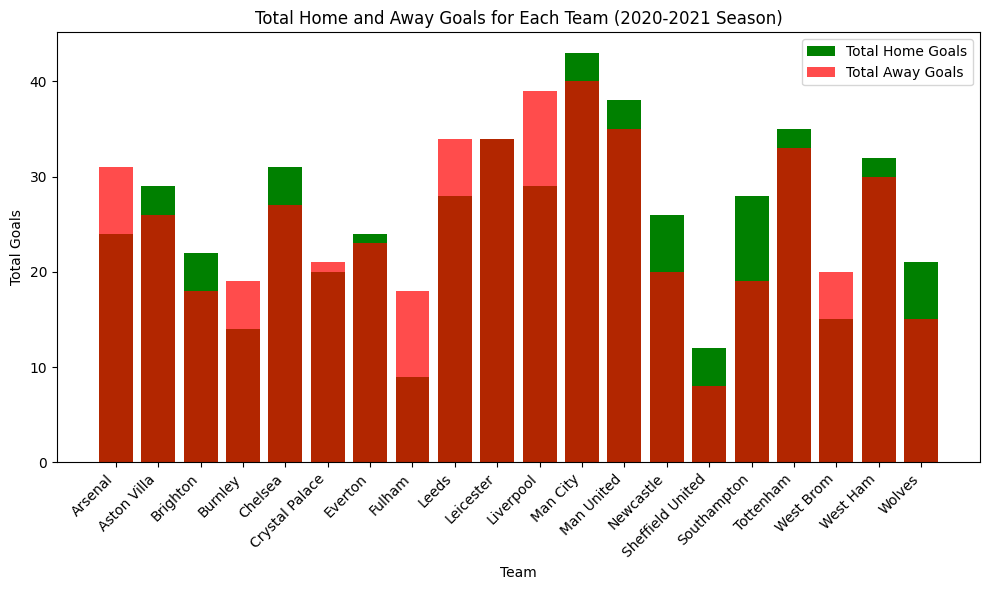

In [ ]:

teams = merged_goals_2020_2021['Team']
total_home_goals = merged_goals_2020_2021['Total Home Goals']
total_away_goals = merged_goals_2020_2021['Total Away Goals']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot green bars for total home goals
ax.bar(teams, total_home_goals, color='green', label='Total Home Goals')

# Plot red bars for total away goals
ax.bar(teams, total_away_goals, color='red', label='Total Away Goals', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Total Goals')
ax.set_title('Total Home and Away Goals for Each Team (2020-2021 Season)')
ax.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


#Calculating total home and away goals for each team for 2021-2022 season.

In [ ]:
# Calculate how many goals each team scored away and at home for the 2021-2022 season
data_2021_2022['HomeGoals'] = data_2021_2022.apply(lambda row: row['FTHG'] if pd.notnull(row['FTHG']) else 0, axis=1)
data_2021_2022['AwayGoals'] = data_2021_2022.apply(lambda row: row['FTAG'] if pd.notnull(row['FTAG']) else 0, axis=1)

# Calculate the total number of goals each team scored at home and away for the 2021-2022 season
home_goals_2021_2022 = data_2021_2022.groupby('HomeTeam')['HomeGoals'].sum().reset_index()
away_goals_2021_2022 = data_2021_2022.groupby('AwayTeam')['AwayGoals'].sum().reset_index()

# Merge home_goals_2021_2022 and away_goals_2021_2022 on the team name
merged_goals_2021_2022 = pd.merge(home_goals_2021_2022, away_goals_2021_2022, left_on='HomeTeam', right_on='AwayTeam', how='outer')

# Rename columns for clarity
merged_goals_2021_2022.rename(columns={'HomeTeam': 'Team', 'HomeGoals': 'Total Home Goals', 'AwayGoals': 'Total Away Goals'}, inplace=True)

# Display the result with three columns for the 2021-2022 season
print("Team\tTotal Home Goals (2021-2022)\tTotal Away Goals (2021-2022)")
print(merged_goals_2021_2022[['Team', 'Total Home Goals', 'Total Away Goals']].to_string(index=False, header=True))


Team	Total Home Goals (2021-2022)	Total Away Goals (2021-2022)
          Team  Total Home Goals  Total Away Goals
       Arsenal                35                26
   Aston Villa                29                23
     Brentford                22                26
      Brighton                19                23
       Burnley                18                16
       Chelsea                37                39
Crystal Palace                27                23
       Everton                27                16
         Leeds                19                23
     Leicester                34                28
     Liverpool                49                45
      Man City                58                41
    Man United                32                25
     Newcastle                26                18
       Norwich                12                11
   Southampton                23                20
     Tottenham                38                31
       Watford     

#Visualize the total home and away goals for each team in the 2021-2022 season using Bar Graph

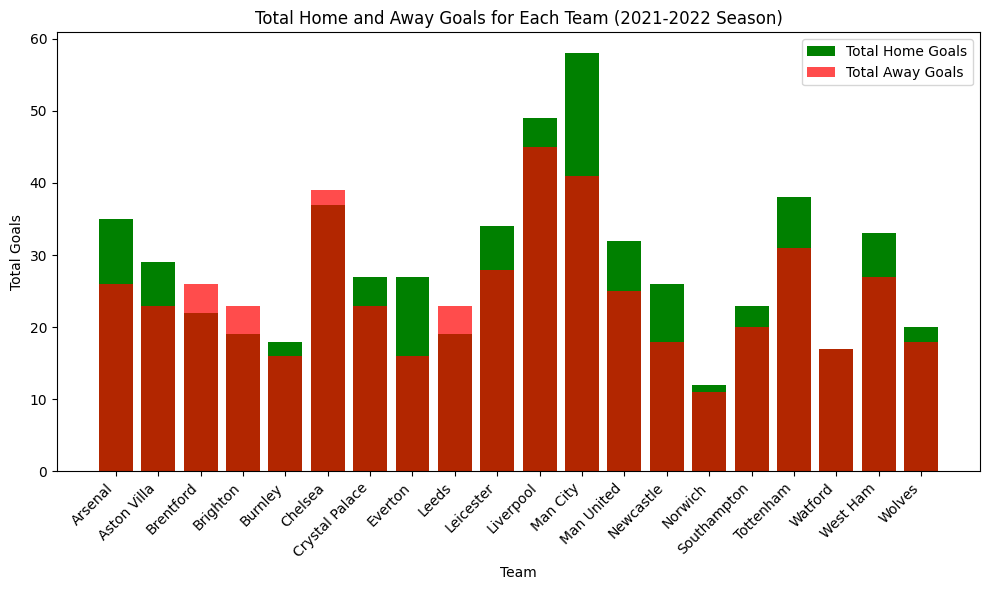

In [ ]:
teams_2021_2022 = merged_goals_2021_2022['Team']
total_home_goals_2021_2022 = merged_goals_2021_2022['Total Home Goals']
total_away_goals_2021_2022 = merged_goals_2021_2022['Total Away Goals']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot green bars for total home goals
ax.bar(teams_2021_2022, total_home_goals_2021_2022, color='green', label='Total Home Goals')

# Plot red bars for total away goals
ax.bar(teams_2021_2022, total_away_goals_2021_2022, color='red', label='Total Away Goals', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Total Goals')
ax.set_title('Total Home and Away Goals for Each Team (2021-2022 Season)')
ax.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


#Creating a two-panel bar graph to compare the two seasons home and away goals .

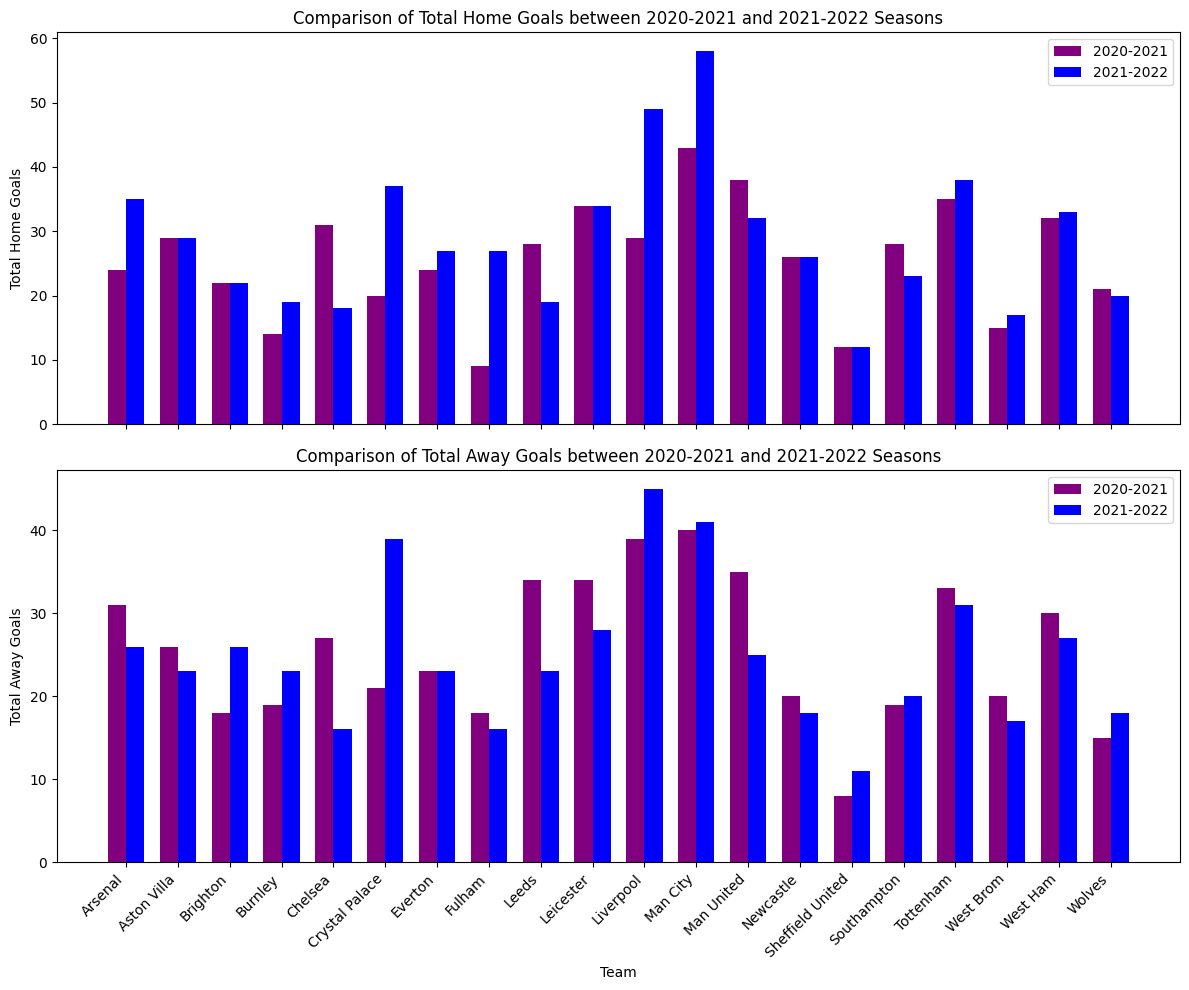

In [ ]:


# Extract relevant columns for comparison
comparison_2020_2021 = merged_goals_2020_2021[['Team', 'Total Home Goals', 'Total Away Goals']]
comparison_2021_2022 = merged_goals_2021_2022[['Team', 'Total Home Goals', 'Total Away Goals']]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Bar graph for total home goals
bar_width = 0.35
bar_positions_2020 = np.arange(len(comparison_2020_2021))
bar_positions_2022 = bar_positions_2020 + bar_width

ax1.bar(bar_positions_2020, comparison_2020_2021['Total Home Goals'], color='purple', width=bar_width, label='2020-2021')
ax1.bar(bar_positions_2022, comparison_2021_2022['Total Home Goals'], color='blue', width=bar_width, label='2021-2022')
ax1.set_ylabel('Total Home Goals')
ax1.set_title('Comparison of Total Home Goals between 2020-2021 and 2021-2022 Seasons')
ax1.set_xticks(bar_positions_2020 + bar_width / 2)
ax1.set_xticklabels(comparison_2020_2021['Team'], rotation=45, ha='right')  # Rotate labels
ax1.legend()

# Bar graph for total away goals
ax2.bar(bar_positions_2020, comparison_2020_2021['Total Away Goals'], color='purple', width=bar_width, label='2020-2021')
ax2.bar(bar_positions_2022, comparison_2021_2022['Total Away Goals'], color='blue', width=bar_width, label='2021-2022')
ax2.set_xlabel('Team')
ax2.set_ylabel('Total Away Goals')
ax2.set_title('Comparison of Total Away Goals between 2020-2021 and 2021-2022 Seasons')
ax2.set_xticks(bar_positions_2020 + bar_width / 2)
ax2.set_xticklabels(comparison_2020_2021['Team'], rotation=45, ha='right')  # Rotate labels
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


#Calculating total goals for each team by summing the home and away goals and then compares them between the two seasons using a bar graph

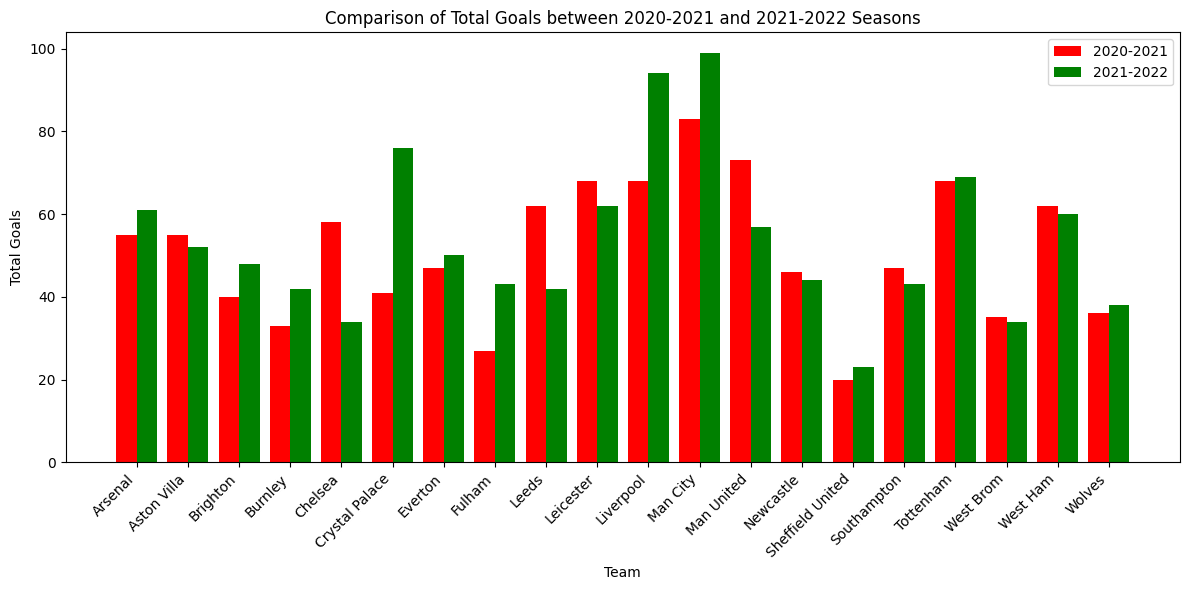

In [ ]:

# Extract relevant columns for comparison
comparison_2020_2021 = merged_goals_2020_2021[['Team', 'Total Home Goals', 'Total Away Goals']]
comparison_2021_2022 = merged_goals_2021_2022[['Team', 'Total Home Goals', 'Total Away Goals']]

# Calculate total goals for each season
comparison_2020_2021['Total Goals 2020-2021'] = comparison_2020_2021['Total Home Goals'] + comparison_2020_2021['Total Away Goals']
comparison_2021_2022['Total Goals 2021-2022'] = comparison_2021_2022['Total Home Goals'] + comparison_2021_2022['Total Away Goals']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar graph for total goals
bar_width = 0.40
bar_positions_2020 = np.arange(len(comparison_2020_2021))
bar_positions_2022 = bar_positions_2020 + bar_width

ax.bar(bar_positions_2020, comparison_2020_2021['Total Goals 2020-2021'], color='red', width=bar_width, label='2020-2021')
ax.bar(bar_positions_2022, comparison_2021_2022['Total Goals 2021-2022'], color='green', width=bar_width, label='2021-2022')
ax.set_xlabel('Team')
ax.set_ylabel('Total Goals')
ax.set_title('Comparison of Total Goals between 2020-2021 and 2021-2022 Seasons')
ax.set_xticks(bar_positions_2020 + bar_width / 2)
ax.set_xticklabels(comparison_2020_2021['Team'], rotation=45, ha='right')  # Rotate labels
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
